In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from catboost import CatBoostClassifier, Pool, cv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler

In [36]:
data = pd.read_csv("D:/projtest2023/mq5/XAUUSD_D1.csv")
data.head()

,Unnamed: 0,index,time,open,high,low,close,ATR5,ATR10,ATR14,...,Previous3_close,Previous4_open,Previous4_high,Previous4_low,Previous4_close,Stoploss,Stopprofit,Type,interval,Profit
0,0,0,2008-01-02,841.0,861.0,839.5,857.2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,2008-01-03,856.2,869.0,853.0,863.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.116279,NaN
2,2,2,2008-01-04,864.2,868.5,853.9,859.2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.667797,NaN
3,3,3,2008-01-07,861.5,864.7,854.8,857.2,NaN,NaN,NaN,...,857.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.600000,NaN
4,4,4,2008-01-08,857.2,880.6,857.0,877.9,NaN,NaN,NaN,...,863.5,841.0,861.0,839.5,857.2,NaN,NaN,NaN,1.301695,NaN


In [37]:
data = data.drop(['Unnamed: 0', 'index', 'time', 'Profit','real_volume_change'], axis=1, inplace=False)
data = data.dropna(axis=0)
data.head()

,open,high,low,close,ATR5,ATR10,ATR14,SMA5,SMA10,EMA5,...,Previous3_low,Previous3_close,Previous4_open,Previous4_high,Previous4_low,Previous4_close,Stoploss,Stopprofit,Type,interval
33,904.0,907.2,899.9,905.2,14.942408,17.055164,17.824130,904.98,906.91,906.029013,...,895.8,904.7,921.9,924.5,902.4,905.9,902.986748,911.413252,1.0,0.675926
34,906.4,930.3,905.5,927.0,16.973926,17.859647,18.343835,909.20,910.82,913.019342,...,901.3,907.1,906.6,910.4,895.8,904.7,926.564398,934.035602,1.0,0.900206
35,927.5,945.3,912.9,943.7,20.059141,19.313683,19.347847,917.00,915.12,923.246228,...,897.3,902.0,906.6,913.6,901.3,907.1,941.056518,949.543482,0.0,1.072016
36,940.7,953.4,937.5,945.5,19.227313,18.972314,19.101572,924.68,918.56,930.664152,...,899.9,905.2,908.5,915.1,897.3,902.0,948.385215,958.414785,0.0,1.001890
37,942.8,949.6,935.3,944.7,18.241850,18.505083,18.758603,933.22,920.82,935.342768,...,905.5,927.0,904.0,907.2,899.9,905.2,944.793172,954.406828,0.0,0.923617


In [38]:
data.describe()

,open,high,low,close,ATR5,ATR10,ATR14,SMA5,SMA10,EMA5,...,Previous3_low,Previous3_close,Previous4_open,Previous4_high,Previous4_low,Previous4_close,Stoploss,Stopprofit,Type,interval
count,4003.000000,4003.000000,4003.000000,4003.000000,4003.000000,4003.000000,4003.000000,4003.000000,4003.000000,4003.000000,...,4003.000000,4003.000000,4003.000000,4003.000000,4003.000000,4003.000000,4003.000000,4003.000000,4003.000000,4003.000000
mean,1407.350272,1417.450972,1396.696722,1407.326103,20.901558,20.904769,20.906765,1406.809633,1406.179790,1406.813644,...,1395.923787,1406.550185,1406.332783,1416.427327,1395.671384,1406.296840,1412.225471,1422.676473,0.271546,0.653203
std,307.747001,309.224763,305.957166,307.745133,8.800113,8.069630,7.727986,307.439324,307.131227,307.308597,...,305.912807,307.706474,307.703243,309.187691,305.903079,307.701083,308.406228,310.056747,0.444813,0.211582
min,713.200000,735.000000,681.400000,710.600000,7.940588,8.984255,9.407272,730.860000,733.810000,728.268763,...,681.400000,710.600000,713.200000,735.000000,681.400000,710.600000,723.936667,746.063333,0.000000,-0.087701
25%,1209.065000,1217.330000,1201.340000,1209.095000,14.759329,14.999160,15.127907,1208.188000,1208.436000,1208.652408,...,1201.200000,1208.680000,1208.835000,1216.900000,1201.155000,1208.635000,1212.929612,1221.746867,0.000000,0.472148
50%,1322.350000,1329.320000,1313.730000,1322.070000,19.148599,19.541880,19.674237,1322.308000,1322.636000,1322.443516,...,1313.400000,1321.980000,1321.860000,1328.760000,1313.360000,1321.850000,1324.964750,1333.519655,0.000000,0.680309
75%,1695.375000,1707.840000,1680.110000,1694.975000,24.686717,24.598119,24.698503,1695.973000,1691.114500,1697.819741,...,1678.315000,1693.270000,1693.380000,1705.545000,1677.540000,1692.610000,1700.685179,1715.292753,1.000000,0.834302
max,2066.550000,2074.870000,2034.440000,2063.250000,80.062586,66.975856,62.580689,2036.300000,2024.962000,2027.204647,...,2034.440000,2063.250000,2066.550000,2074.870000,2034.440000,2063.250000,2065.332809,2084.407191,1.000000,1.072016


# 1 Pool shuffer

In [39]:
#特征和标签
X = data.drop(columns = ['Type'])
Y = data['Type']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state = 3)

train_pool = Pool(X_train, Y_train)

params = {
    'task_type':'GPU',
    'iterations': 1000,
    'learning_rate': 0.02,
    'depth': 8,
    'early_stopping_rounds': 5,
}

model = CatBoostClassifier(**params)
model.fit(train_pool)

0:	learn: 0.6867010	total: 39.6ms	remaining: 39.5s
1:	learn: 0.6806115	total: 162ms	remaining: 1m 20s
2:	learn: 0.6752940	total: 204ms	remaining: 1m 7s
3:	learn: 0.6697544	total: 315ms	remaining: 1m 18s
4:	learn: 0.6648522	total: 337ms	remaining: 1m 7s
5:	learn: 0.6600181	total: 442ms	remaining: 1m 13s
6:	learn: 0.6548983	total: 549ms	remaining: 1m 17s
7:	learn: 0.6506123	total: 602ms	remaining: 1m 14s
8:	learn: 0.6463311	total: 638ms	remaining: 1m 10s
9:	learn: 0.6421970	total: 744ms	remaining: 1m 13s
10:	learn: 0.6379056	total: 853ms	remaining: 1m 16s
11:	learn: 0.6336357	total: 959ms	remaining: 1m 18s
12:	learn: 0.6298194	total: 1.07s	remaining: 1m 21s
13:	learn: 0.6259833	total: 1.18s	remaining: 1m 22s
14:	learn: 0.6225087	total: 1.26s	remaining: 1m 22s
15:	learn: 0.6189120	total: 1.36s	remaining: 1m 23s
16:	learn: 0.6159410	total: 1.47s	remaining: 1m 24s
17:	learn: 0.6129883	total: 1.57s	remaining: 1m 25s
18:	learn: 0.6101679	total: 1.68s	remaining: 1m 26s
19:	learn: 0.6071983	tot

159:	learn: 0.4740262	total: 17s	remaining: 1m 29s
160:	learn: 0.4736668	total: 17.1s	remaining: 1m 29s
161:	learn: 0.4733647	total: 17.2s	remaining: 1m 29s
162:	learn: 0.4731002	total: 17.4s	remaining: 1m 29s
163:	learn: 0.4726326	total: 17.5s	remaining: 1m 29s
164:	learn: 0.4718917	total: 17.6s	remaining: 1m 28s
165:	learn: 0.4714729	total: 17.7s	remaining: 1m 28s
166:	learn: 0.4709945	total: 17.8s	remaining: 1m 28s
167:	learn: 0.4707253	total: 17.9s	remaining: 1m 28s
168:	learn: 0.4701639	total: 18s	remaining: 1m 28s
169:	learn: 0.4696472	total: 18.1s	remaining: 1m 28s
170:	learn: 0.4694005	total: 18.2s	remaining: 1m 28s
171:	learn: 0.4691100	total: 18.3s	remaining: 1m 28s
172:	learn: 0.4688974	total: 18.4s	remaining: 1m 28s
173:	learn: 0.4687101	total: 18.5s	remaining: 1m 28s
174:	learn: 0.4684272	total: 18.6s	remaining: 1m 27s
175:	learn: 0.4679780	total: 18.8s	remaining: 1m 27s
176:	learn: 0.4674334	total: 18.9s	remaining: 1m 27s
177:	learn: 0.4671045	total: 19s	remaining: 1m 27s

317:	learn: 0.4393689	total: 30.7s	remaining: 1m 5s
318:	learn: 0.4393688	total: 30.7s	remaining: 1m 5s
319:	learn: 0.4391680	total: 30.8s	remaining: 1m 5s
320:	learn: 0.4390514	total: 30.9s	remaining: 1m 5s
321:	learn: 0.4385137	total: 31s	remaining: 1m 5s
322:	learn: 0.4385137	total: 31s	remaining: 1m 5s
323:	learn: 0.4385135	total: 31.1s	remaining: 1m 4s
324:	learn: 0.4384124	total: 31.2s	remaining: 1m 4s
325:	learn: 0.4384102	total: 31.2s	remaining: 1m 4s
326:	learn: 0.4382309	total: 31.3s	remaining: 1m 4s
327:	learn: 0.4381583	total: 31.3s	remaining: 1m 4s
328:	learn: 0.4381554	total: 31.4s	remaining: 1m 3s
329:	learn: 0.4380283	total: 31.5s	remaining: 1m 3s
330:	learn: 0.4379952	total: 31.5s	remaining: 1m 3s
331:	learn: 0.4378898	total: 31.6s	remaining: 1m 3s
332:	learn: 0.4376725	total: 31.7s	remaining: 1m 3s
333:	learn: 0.4376724	total: 31.7s	remaining: 1m 3s
334:	learn: 0.4375680	total: 31.8s	remaining: 1m 3s
335:	learn: 0.4370274	total: 31.9s	remaining: 1m 3s
336:	learn: 0.43

482:	learn: 0.4216200	total: 39.9s	remaining: 42.8s
483:	learn: 0.4216200	total: 40s	remaining: 42.6s
484:	learn: 0.4210799	total: 40.1s	remaining: 42.5s
485:	learn: 0.4203625	total: 40.2s	remaining: 42.5s
486:	learn: 0.4203623	total: 40.2s	remaining: 42.3s
487:	learn: 0.4203623	total: 40.2s	remaining: 42.2s
488:	learn: 0.4200632	total: 40.3s	remaining: 42.1s
489:	learn: 0.4200632	total: 40.3s	remaining: 42s
490:	learn: 0.4200631	total: 40.4s	remaining: 41.8s
491:	learn: 0.4200631	total: 40.4s	remaining: 41.7s
492:	learn: 0.4199397	total: 40.5s	remaining: 41.6s
493:	learn: 0.4192578	total: 40.6s	remaining: 41.6s
494:	learn: 0.4191036	total: 40.7s	remaining: 41.5s
495:	learn: 0.4191036	total: 40.7s	remaining: 41.4s
496:	learn: 0.4191035	total: 40.7s	remaining: 41.2s
497:	learn: 0.4191034	total: 40.8s	remaining: 41.1s
498:	learn: 0.4191033	total: 40.8s	remaining: 40.9s
499:	learn: 0.4191033	total: 40.8s	remaining: 40.8s
500:	learn: 0.4191032	total: 40.8s	remaining: 40.6s
501:	learn: 0.41

643:	learn: 0.3982582	total: 50.3s	remaining: 27.8s
644:	learn: 0.3982581	total: 50.3s	remaining: 27.7s
645:	learn: 0.3982580	total: 50.3s	remaining: 27.6s
646:	learn: 0.3982579	total: 50.3s	remaining: 27.4s
647:	learn: 0.3982579	total: 50.3s	remaining: 27.3s
648:	learn: 0.3982578	total: 50.3s	remaining: 27.2s
649:	learn: 0.3982578	total: 50.4s	remaining: 27.1s
650:	learn: 0.3980063	total: 50.5s	remaining: 27.1s
651:	learn: 0.3980062	total: 50.5s	remaining: 26.9s
652:	learn: 0.3979259	total: 50.6s	remaining: 26.9s
653:	learn: 0.3974004	total: 50.7s	remaining: 26.8s
654:	learn: 0.3974004	total: 50.7s	remaining: 26.7s
655:	learn: 0.3971738	total: 50.8s	remaining: 26.6s
656:	learn: 0.3971738	total: 50.8s	remaining: 26.5s
657:	learn: 0.3967727	total: 50.9s	remaining: 26.5s
658:	learn: 0.3967727	total: 51s	remaining: 26.4s
659:	learn: 0.3966634	total: 51.1s	remaining: 26.3s
660:	learn: 0.3966634	total: 51.1s	remaining: 26.2s
661:	learn: 0.3966633	total: 51.1s	remaining: 26.1s
662:	learn: 0.

803:	learn: 0.3781987	total: 59.3s	remaining: 14.5s
804:	learn: 0.3779192	total: 59.4s	remaining: 14.4s
805:	learn: 0.3776466	total: 59.5s	remaining: 14.3s
806:	learn: 0.3776465	total: 59.5s	remaining: 14.2s
807:	learn: 0.3771693	total: 59.6s	remaining: 14.2s
808:	learn: 0.3770315	total: 59.8s	remaining: 14.1s
809:	learn: 0.3770315	total: 59.8s	remaining: 14s
810:	learn: 0.3769383	total: 59.9s	remaining: 14s
811:	learn: 0.3767726	total: 60s	remaining: 13.9s
812:	learn: 0.3767725	total: 60s	remaining: 13.8s
813:	learn: 0.3767725	total: 1m	remaining: 13.7s
814:	learn: 0.3763141	total: 1m	remaining: 13.6s
815:	learn: 0.3761693	total: 1m	remaining: 13.6s
816:	learn: 0.3761691	total: 1m	remaining: 13.5s
817:	learn: 0.3761690	total: 1m	remaining: 13.4s
818:	learn: 0.3761690	total: 1m	remaining: 13.3s
819:	learn: 0.3758089	total: 1m	remaining: 13.3s
820:	learn: 0.3754624	total: 1m	remaining: 13.2s
821:	learn: 0.3754624	total: 1m	remaining: 13.1s
822:	learn: 0.3751410	total: 1m	remaining: 13s


962:	learn: 0.3554755	total: 1m 9s	remaining: 2.68s
963:	learn: 0.3554754	total: 1m 9s	remaining: 2.6s
964:	learn: 0.3551805	total: 1m 9s	remaining: 2.53s
965:	learn: 0.3551805	total: 1m 9s	remaining: 2.46s
966:	learn: 0.3551804	total: 1m 9s	remaining: 2.38s
967:	learn: 0.3548138	total: 1m 9s	remaining: 2.31s
968:	learn: 0.3544947	total: 1m 10s	remaining: 2.24s
969:	learn: 0.3543259	total: 1m 10s	remaining: 2.17s
970:	learn: 0.3540499	total: 1m 10s	remaining: 2.1s
971:	learn: 0.3535201	total: 1m 10s	remaining: 2.03s
972:	learn: 0.3535200	total: 1m 10s	remaining: 1.95s
973:	learn: 0.3532171	total: 1m 10s	remaining: 1.88s
974:	learn: 0.3532170	total: 1m 10s	remaining: 1.81s
975:	learn: 0.3532169	total: 1m 10s	remaining: 1.73s
976:	learn: 0.3529283	total: 1m 10s	remaining: 1.66s
977:	learn: 0.3529281	total: 1m 10s	remaining: 1.59s
978:	learn: 0.3527017	total: 1m 10s	remaining: 1.52s
979:	learn: 0.3525122	total: 1m 10s	remaining: 1.45s
980:	learn: 0.3525121	total: 1m 10s	remaining: 1.37s
9

In [40]:
test_pool = Pool(X_test)
#test
y_pred = model.predict(test_pool)
#混淆矩阵
cmatrix = confusion_matrix(Y_test, y_pred)
cmatrix[::-1, ::-1]

array([[558,  16],
       [204,  23]], dtype=int64)

In [41]:
#test
y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
print("Accuracy:", accuracy,"f1:", f1,"recall:", recall,"precision:", precision)


Accuracy: 0.7253433208489388 f1: 0.17293233082706766 recall: 0.1013215859030837 precision: 0.5897435897435898


In [42]:
#train
y_train_pred = model.predict(X_train)
accuracy_train = accuracy_score(Y_train, y_train_pred)
f1_train = f1_score(Y_train, y_train_pred)
recall_train = recall_score(Y_train, y_train_pred)
precision_train = precision_score(Y_train, y_train_pred)
print("Accuracy:", accuracy_train,"f1:", f1_train,"recall:", recall_train,"precision:", precision_train)


Accuracy: 0.8547782635852592 f1: 0.6306592533756951 recall: 0.46162790697674416 precision: 0.9949874686716792


In [43]:
#混淆矩阵train
cmatrix_train = confusion_matrix(Y_train, y_train_pred)
cmatrix_train[::-1, ::-1]

array([[2340,    2],
       [ 463,  397]], dtype=int64)

# 500test

In [44]:
data = pd.read_csv("D:/projtest2023/mq5/XAUUSD_D1.csv")
data = data.drop(['Unnamed: 0', 'index', 'time', 'Profit'], axis=1, inplace=False)
data = data.dropna(axis=0)
#特征和标签
X = data.drop(columns = ['Type'])
Y = data['Type']
X_train,X_test,Y_train,Y_test = X[:-500],X[-500:],Y[:-500],Y[-500:]

train_pool = Pool(X_train, Y_train)

params = {
    'task_type':'GPU',
    'iterations': 1000,
    'learning_rate': 0.02,
    'depth': 8,
    'early_stopping_rounds': 5,
}

model = CatBoostClassifier(**params)
model.fit(train_pool)

0:	learn: 0.6870310	total: 58.8ms	remaining: 58.7s
1:	learn: 0.6813563	total: 177ms	remaining: 1m 28s
2:	learn: 0.6761092	total: 205ms	remaining: 1m 8s
3:	learn: 0.6710685	total: 319ms	remaining: 1m 19s
4:	learn: 0.6664173	total: 341ms	remaining: 1m 7s
5:	learn: 0.6617910	total: 449ms	remaining: 1m 14s
6:	learn: 0.6572090	total: 554ms	remaining: 1m 18s
7:	learn: 0.6529723	total: 658ms	remaining: 1m 21s
8:	learn: 0.6487681	total: 764ms	remaining: 1m 24s
9:	learn: 0.6442660	total: 872ms	remaining: 1m 26s
10:	learn: 0.6400516	total: 980ms	remaining: 1m 28s
11:	learn: 0.6362320	total: 1.03s	remaining: 1m 25s
12:	learn: 0.6321973	total: 1.14s	remaining: 1m 26s
13:	learn: 0.6286586	total: 1.25s	remaining: 1m 28s
14:	learn: 0.6250893	total: 1.36s	remaining: 1m 29s
15:	learn: 0.6216153	total: 1.46s	remaining: 1m 30s
16:	learn: 0.6187685	total: 1.57s	remaining: 1m 30s
17:	learn: 0.6157114	total: 1.68s	remaining: 1m 31s
18:	learn: 0.6129466	total: 1.78s	remaining: 1m 32s
19:	learn: 0.6099622	tot

159:	learn: 0.4840967	total: 17.1s	remaining: 1m 29s
160:	learn: 0.4835445	total: 17.2s	remaining: 1m 29s
161:	learn: 0.4830200	total: 17.3s	remaining: 1m 29s
162:	learn: 0.4823562	total: 17.4s	remaining: 1m 29s
163:	learn: 0.4820315	total: 17.5s	remaining: 1m 29s
164:	learn: 0.4816128	total: 17.6s	remaining: 1m 29s
165:	learn: 0.4814062	total: 17.7s	remaining: 1m 29s
166:	learn: 0.4809773	total: 17.9s	remaining: 1m 29s
167:	learn: 0.4806497	total: 18s	remaining: 1m 28s
168:	learn: 0.4802104	total: 18.1s	remaining: 1m 28s
169:	learn: 0.4800002	total: 18.2s	remaining: 1m 28s
170:	learn: 0.4795531	total: 18.3s	remaining: 1m 28s
171:	learn: 0.4793084	total: 18.4s	remaining: 1m 28s
172:	learn: 0.4789576	total: 18.5s	remaining: 1m 28s
173:	learn: 0.4783445	total: 18.6s	remaining: 1m 28s
174:	learn: 0.4780021	total: 18.7s	remaining: 1m 28s
175:	learn: 0.4777667	total: 18.8s	remaining: 1m 28s
176:	learn: 0.4772390	total: 18.9s	remaining: 1m 28s
177:	learn: 0.4765160	total: 19.1s	remaining: 1m

315:	learn: 0.4367089	total: 33.7s	remaining: 1m 12s
316:	learn: 0.4364514	total: 33.8s	remaining: 1m 12s
317:	learn: 0.4362093	total: 33.9s	remaining: 1m 12s
318:	learn: 0.4359355	total: 34s	remaining: 1m 12s
319:	learn: 0.4357606	total: 34.1s	remaining: 1m 12s
320:	learn: 0.4355722	total: 34.2s	remaining: 1m 12s
321:	learn: 0.4353666	total: 34.3s	remaining: 1m 12s
322:	learn: 0.4349964	total: 34.5s	remaining: 1m 12s
323:	learn: 0.4347239	total: 34.6s	remaining: 1m 12s
324:	learn: 0.4343924	total: 34.7s	remaining: 1m 12s
325:	learn: 0.4341148	total: 34.8s	remaining: 1m 11s
326:	learn: 0.4340294	total: 34.9s	remaining: 1m 11s
327:	learn: 0.4337583	total: 35s	remaining: 1m 11s
328:	learn: 0.4335334	total: 35.1s	remaining: 1m 11s
329:	learn: 0.4332840	total: 35.2s	remaining: 1m 11s
330:	learn: 0.4332014	total: 35.3s	remaining: 1m 11s
331:	learn: 0.4330154	total: 35.4s	remaining: 1m 11s
332:	learn: 0.4328501	total: 35.5s	remaining: 1m 11s
333:	learn: 0.4325411	total: 35.6s	remaining: 1m 1

474:	learn: 0.4004741	total: 49.5s	remaining: 54.7s
475:	learn: 0.4003658	total: 49.6s	remaining: 54.6s
476:	learn: 0.3999835	total: 49.7s	remaining: 54.5s
477:	learn: 0.3998169	total: 49.8s	remaining: 54.4s
478:	learn: 0.3994280	total: 49.9s	remaining: 54.3s
479:	learn: 0.3991160	total: 50.1s	remaining: 54.2s
480:	learn: 0.3988795	total: 50.2s	remaining: 54.1s
481:	learn: 0.3986768	total: 50.3s	remaining: 54s
482:	learn: 0.3986758	total: 50.3s	remaining: 53.8s
483:	learn: 0.3984308	total: 50.4s	remaining: 53.7s
484:	learn: 0.3984299	total: 50.4s	remaining: 53.5s
485:	learn: 0.3984289	total: 50.4s	remaining: 53.3s
486:	learn: 0.3980235	total: 50.5s	remaining: 53.2s
487:	learn: 0.3976892	total: 50.7s	remaining: 53.1s
488:	learn: 0.3976345	total: 50.8s	remaining: 53s
489:	learn: 0.3973857	total: 50.9s	remaining: 52.9s
490:	learn: 0.3967724	total: 51s	remaining: 52.9s
491:	learn: 0.3965378	total: 51.1s	remaining: 52.8s
492:	learn: 0.3963988	total: 51.2s	remaining: 52.7s
493:	learn: 0.3962

635:	learn: 0.3690561	total: 1m 5s	remaining: 37.3s
636:	learn: 0.3690557	total: 1m 5s	remaining: 37.1s
637:	learn: 0.3687429	total: 1m 5s	remaining: 37.1s
638:	learn: 0.3687402	total: 1m 5s	remaining: 36.9s
639:	learn: 0.3686246	total: 1m 5s	remaining: 36.8s
640:	learn: 0.3682173	total: 1m 5s	remaining: 36.7s
641:	learn: 0.3678440	total: 1m 5s	remaining: 36.6s
642:	learn: 0.3675249	total: 1m 5s	remaining: 36.5s
643:	learn: 0.3672864	total: 1m 5s	remaining: 36.4s
644:	learn: 0.3672503	total: 1m 5s	remaining: 36.3s
645:	learn: 0.3668955	total: 1m 6s	remaining: 36.2s
646:	learn: 0.3668585	total: 1m 6s	remaining: 36.1s
647:	learn: 0.3668224	total: 1m 6s	remaining: 36s
648:	learn: 0.3667829	total: 1m 6s	remaining: 35.9s
649:	learn: 0.3667825	total: 1m 6s	remaining: 35.8s
650:	learn: 0.3665780	total: 1m 6s	remaining: 35.7s
651:	learn: 0.3662873	total: 1m 6s	remaining: 35.6s
652:	learn: 0.3662843	total: 1m 6s	remaining: 35.4s
653:	learn: 0.3656618	total: 1m 6s	remaining: 35.3s
654:	learn: 0.

793:	learn: 0.3451655	total: 1m 18s	remaining: 20.3s
794:	learn: 0.3451373	total: 1m 18s	remaining: 20.2s
795:	learn: 0.3451372	total: 1m 18s	remaining: 20.1s
796:	learn: 0.3449837	total: 1m 18s	remaining: 20s
797:	learn: 0.3447553	total: 1m 18s	remaining: 19.9s
798:	learn: 0.3447136	total: 1m 18s	remaining: 19.8s
799:	learn: 0.3447135	total: 1m 18s	remaining: 19.7s
800:	learn: 0.3447134	total: 1m 18s	remaining: 19.6s
801:	learn: 0.3447133	total: 1m 18s	remaining: 19.4s
802:	learn: 0.3446321	total: 1m 18s	remaining: 19.4s
803:	learn: 0.3443211	total: 1m 19s	remaining: 19.3s
804:	learn: 0.3441906	total: 1m 19s	remaining: 19.2s
805:	learn: 0.3441905	total: 1m 19s	remaining: 19s
806:	learn: 0.3439656	total: 1m 19s	remaining: 18.9s
807:	learn: 0.3439655	total: 1m 19s	remaining: 18.8s
808:	learn: 0.3434708	total: 1m 19s	remaining: 18.7s
809:	learn: 0.3434707	total: 1m 19s	remaining: 18.6s
810:	learn: 0.3433400	total: 1m 19s	remaining: 18.5s
811:	learn: 0.3430781	total: 1m 19s	remaining: 18.

949:	learn: 0.3239652	total: 1m 32s	remaining: 4.87s
950:	learn: 0.3238950	total: 1m 32s	remaining: 4.77s
951:	learn: 0.3238659	total: 1m 32s	remaining: 4.68s
952:	learn: 0.3235469	total: 1m 32s	remaining: 4.58s
953:	learn: 0.3235031	total: 1m 32s	remaining: 4.48s
954:	learn: 0.3234022	total: 1m 33s	remaining: 4.38s
955:	learn: 0.3232369	total: 1m 33s	remaining: 4.29s
956:	learn: 0.3229317	total: 1m 33s	remaining: 4.19s
957:	learn: 0.3228117	total: 1m 33s	remaining: 4.09s
958:	learn: 0.3227902	total: 1m 33s	remaining: 4s
959:	learn: 0.3226973	total: 1m 33s	remaining: 3.9s
960:	learn: 0.3225004	total: 1m 33s	remaining: 3.8s
961:	learn: 0.3223643	total: 1m 33s	remaining: 3.71s
962:	learn: 0.3220046	total: 1m 33s	remaining: 3.61s
963:	learn: 0.3218631	total: 1m 34s	remaining: 3.51s
964:	learn: 0.3218254	total: 1m 34s	remaining: 3.41s
965:	learn: 0.3217630	total: 1m 34s	remaining: 3.32s
966:	learn: 0.3217129	total: 1m 34s	remaining: 3.22s
967:	learn: 0.3214694	total: 1m 34s	remaining: 3.12

In [34]:
test_pool = Pool(X_test)
#test
y_pred = model.predict(test_pool)
#混淆矩阵
cmatrix = confusion_matrix(Y_test, y_pred)
cmatrix[::-1, ::-1]

array([[353,  26],
       [106,  15]], dtype=int64)

In [35]:
#test
y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
print("Accuracy:", accuracy,"f1:", f1,"recall:", recall,"precision:", precision)


Accuracy: 0.736 f1: 0.18518518518518517 recall: 0.12396694214876033 precision: 0.36585365853658536


# 标准化

In [85]:
data = pd.read_csv("D:/projtest2023/mq5/XAUUSD_D1.csv")
data = data.drop(['Unnamed: 0', 'index', 'time', 'Profit'], axis=1, inplace=False)
data = data.dropna(axis=0)
#特征和标签
X = data.drop(columns = ['Type'])
Y = data['Type']

#标准化StandardScaler()
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train,X_test,Y_train,Y_test = X[:-500],X[-500:],Y[:-500],Y[-500:]
train_pool = Pool(X_train, Y_train)
# {i:list(Y_train).count(i) for i in set(Y_train)} {0.0: 2537, 1.0: 966} (2537+966)/
class_weights = {0.0: 1.38076, 1.0: 3.62629}

params = {
    'iterations': 2000,
    'learning_rate': 0.02,
    'depth': 6,
    'early_stopping_rounds': 5,
    'class_weights':class_weights
}

model = CatBoostClassifier(**params)
model.fit(train_pool)

0:	learn: 0.6918647	total: 5.36ms	remaining: 10.7s
1:	learn: 0.6906216	total: 10.4ms	remaining: 10.4s
2:	learn: 0.6898850	total: 15.6ms	remaining: 10.4s
3:	learn: 0.6889923	total: 19.5ms	remaining: 9.72s
4:	learn: 0.6877943	total: 22.8ms	remaining: 9.08s
5:	learn: 0.6865959	total: 25.8ms	remaining: 8.57s
6:	learn: 0.6856057	total: 29ms	remaining: 8.26s
7:	learn: 0.6845831	total: 32ms	remaining: 7.96s
8:	learn: 0.6833884	total: 35ms	remaining: 7.74s
9:	learn: 0.6822980	total: 37.9ms	remaining: 7.55s
10:	learn: 0.6809962	total: 40.9ms	remaining: 7.39s
11:	learn: 0.6797360	total: 44ms	remaining: 7.28s
12:	learn: 0.6785855	total: 46.8ms	remaining: 7.14s
13:	learn: 0.6776565	total: 49.1ms	remaining: 6.97s
14:	learn: 0.6765463	total: 51.4ms	remaining: 6.79s
15:	learn: 0.6753607	total: 53.6ms	remaining: 6.64s
16:	learn: 0.6742918	total: 55.7ms	remaining: 6.5s
17:	learn: 0.6731171	total: 58ms	remaining: 6.39s
18:	learn: 0.6721254	total: 60.2ms	remaining: 6.28s
19:	learn: 0.6713308	total: 62.5m

178:	learn: 0.5882954	total: 414ms	remaining: 4.21s
179:	learn: 0.5877641	total: 417ms	remaining: 4.21s
180:	learn: 0.5873799	total: 419ms	remaining: 4.21s
181:	learn: 0.5871537	total: 421ms	remaining: 4.21s
182:	learn: 0.5865730	total: 424ms	remaining: 4.21s
183:	learn: 0.5861707	total: 426ms	remaining: 4.21s
184:	learn: 0.5857669	total: 429ms	remaining: 4.21s
185:	learn: 0.5855418	total: 431ms	remaining: 4.21s
186:	learn: 0.5851986	total: 434ms	remaining: 4.2s
187:	learn: 0.5849166	total: 436ms	remaining: 4.2s
188:	learn: 0.5846926	total: 438ms	remaining: 4.2s
189:	learn: 0.5842863	total: 440ms	remaining: 4.2s
190:	learn: 0.5839999	total: 443ms	remaining: 4.19s
191:	learn: 0.5837893	total: 445ms	remaining: 4.19s
192:	learn: 0.5834426	total: 447ms	remaining: 4.19s
193:	learn: 0.5830449	total: 449ms	remaining: 4.18s
194:	learn: 0.5824996	total: 452ms	remaining: 4.18s
195:	learn: 0.5821679	total: 454ms	remaining: 4.18s
196:	learn: 0.5816317	total: 456ms	remaining: 4.18s
197:	learn: 0.58

355:	learn: 0.5325274	total: 814ms	remaining: 3.76s
356:	learn: 0.5322831	total: 817ms	remaining: 3.76s
357:	learn: 0.5317987	total: 819ms	remaining: 3.76s
358:	learn: 0.5316236	total: 821ms	remaining: 3.75s
359:	learn: 0.5312909	total: 824ms	remaining: 3.75s
360:	learn: 0.5310145	total: 826ms	remaining: 3.75s
361:	learn: 0.5306434	total: 828ms	remaining: 3.75s
362:	learn: 0.5304431	total: 831ms	remaining: 3.75s
363:	learn: 0.5301321	total: 833ms	remaining: 3.74s
364:	learn: 0.5298204	total: 836ms	remaining: 3.74s
365:	learn: 0.5295902	total: 838ms	remaining: 3.74s
366:	learn: 0.5292404	total: 840ms	remaining: 3.74s
367:	learn: 0.5290463	total: 843ms	remaining: 3.74s
368:	learn: 0.5287866	total: 845ms	remaining: 3.73s
369:	learn: 0.5285352	total: 848ms	remaining: 3.73s
370:	learn: 0.5280765	total: 850ms	remaining: 3.73s
371:	learn: 0.5277434	total: 852ms	remaining: 3.73s
372:	learn: 0.5275764	total: 854ms	remaining: 3.73s
373:	learn: 0.5272161	total: 857ms	remaining: 3.72s
374:	learn: 

522:	learn: 0.4743836	total: 1.21s	remaining: 3.42s
523:	learn: 0.4739583	total: 1.22s	remaining: 3.42s
524:	learn: 0.4733887	total: 1.22s	remaining: 3.42s
525:	learn: 0.4731160	total: 1.22s	remaining: 3.42s
526:	learn: 0.4726263	total: 1.22s	remaining: 3.42s
527:	learn: 0.4722950	total: 1.23s	remaining: 3.42s
528:	learn: 0.4717751	total: 1.23s	remaining: 3.42s
529:	learn: 0.4713991	total: 1.23s	remaining: 3.42s
530:	learn: 0.4710058	total: 1.23s	remaining: 3.41s
531:	learn: 0.4708295	total: 1.24s	remaining: 3.41s
532:	learn: 0.4705690	total: 1.24s	remaining: 3.41s
533:	learn: 0.4702025	total: 1.24s	remaining: 3.41s
534:	learn: 0.4698593	total: 1.24s	remaining: 3.41s
535:	learn: 0.4696752	total: 1.25s	remaining: 3.41s
536:	learn: 0.4691364	total: 1.25s	remaining: 3.4s
537:	learn: 0.4685153	total: 1.25s	remaining: 3.4s
538:	learn: 0.4681206	total: 1.25s	remaining: 3.4s
539:	learn: 0.4677836	total: 1.26s	remaining: 3.4s
540:	learn: 0.4672543	total: 1.26s	remaining: 3.4s
541:	learn: 0.466

694:	learn: 0.4083347	total: 1.61s	remaining: 3.03s
695:	learn: 0.4080006	total: 1.62s	remaining: 3.03s
696:	learn: 0.4075887	total: 1.62s	remaining: 3.03s
697:	learn: 0.4073674	total: 1.62s	remaining: 3.03s
698:	learn: 0.4071078	total: 1.63s	remaining: 3.02s
699:	learn: 0.4067297	total: 1.63s	remaining: 3.02s
700:	learn: 0.4065019	total: 1.63s	remaining: 3.02s
701:	learn: 0.4061900	total: 1.64s	remaining: 3.02s
702:	learn: 0.4058323	total: 1.64s	remaining: 3.02s
703:	learn: 0.4054297	total: 1.64s	remaining: 3.02s
704:	learn: 0.4051215	total: 1.64s	remaining: 3.02s
705:	learn: 0.4045822	total: 1.65s	remaining: 3.02s
706:	learn: 0.4043744	total: 1.65s	remaining: 3.02s
707:	learn: 0.4039605	total: 1.65s	remaining: 3.01s
708:	learn: 0.4035033	total: 1.65s	remaining: 3.01s
709:	learn: 0.4030964	total: 1.66s	remaining: 3.01s
710:	learn: 0.4026901	total: 1.66s	remaining: 3.01s
711:	learn: 0.4025145	total: 1.66s	remaining: 3s
712:	learn: 0.4021032	total: 1.66s	remaining: 3s
713:	learn: 0.4017

863:	learn: 0.3537289	total: 2.01s	remaining: 2.65s
864:	learn: 0.3535174	total: 2.02s	remaining: 2.65s
865:	learn: 0.3534336	total: 2.02s	remaining: 2.64s
866:	learn: 0.3530904	total: 2.02s	remaining: 2.64s
867:	learn: 0.3527825	total: 2.02s	remaining: 2.64s
868:	learn: 0.3525163	total: 2.03s	remaining: 2.64s
869:	learn: 0.3521706	total: 2.03s	remaining: 2.63s
870:	learn: 0.3519365	total: 2.03s	remaining: 2.63s
871:	learn: 0.3516477	total: 2.03s	remaining: 2.63s
872:	learn: 0.3514971	total: 2.04s	remaining: 2.63s
873:	learn: 0.3512342	total: 2.04s	remaining: 2.63s
874:	learn: 0.3510918	total: 2.04s	remaining: 2.62s
875:	learn: 0.3508977	total: 2.04s	remaining: 2.62s
876:	learn: 0.3506038	total: 2.04s	remaining: 2.62s
877:	learn: 0.3504370	total: 2.05s	remaining: 2.62s
878:	learn: 0.3502611	total: 2.05s	remaining: 2.62s
879:	learn: 0.3499711	total: 2.05s	remaining: 2.61s
880:	learn: 0.3497239	total: 2.06s	remaining: 2.61s
881:	learn: 0.3495561	total: 2.06s	remaining: 2.61s
882:	learn: 

1035:	learn: 0.3091968	total: 2.41s	remaining: 2.24s
1036:	learn: 0.3090449	total: 2.41s	remaining: 2.24s
1037:	learn: 0.3088494	total: 2.42s	remaining: 2.24s
1038:	learn: 0.3085850	total: 2.42s	remaining: 2.24s
1039:	learn: 0.3083075	total: 2.42s	remaining: 2.23s
1040:	learn: 0.3080736	total: 2.42s	remaining: 2.23s
1041:	learn: 0.3077917	total: 2.43s	remaining: 2.23s
1042:	learn: 0.3074608	total: 2.43s	remaining: 2.23s
1043:	learn: 0.3071446	total: 2.43s	remaining: 2.23s
1044:	learn: 0.3068181	total: 2.43s	remaining: 2.22s
1045:	learn: 0.3066364	total: 2.44s	remaining: 2.22s
1046:	learn: 0.3064511	total: 2.44s	remaining: 2.22s
1047:	learn: 0.3062272	total: 2.44s	remaining: 2.22s
1048:	learn: 0.3060520	total: 2.44s	remaining: 2.21s
1049:	learn: 0.3058847	total: 2.44s	remaining: 2.21s
1050:	learn: 0.3056654	total: 2.45s	remaining: 2.21s
1051:	learn: 0.3054439	total: 2.45s	remaining: 2.21s
1052:	learn: 0.3050737	total: 2.45s	remaining: 2.21s
1053:	learn: 0.3048009	total: 2.45s	remaining:

1207:	learn: 0.2719003	total: 2.81s	remaining: 1.84s
1208:	learn: 0.2717014	total: 2.81s	remaining: 1.84s
1209:	learn: 0.2715792	total: 2.82s	remaining: 1.84s
1210:	learn: 0.2713771	total: 2.82s	remaining: 1.84s
1211:	learn: 0.2711966	total: 2.82s	remaining: 1.83s
1212:	learn: 0.2710878	total: 2.82s	remaining: 1.83s
1213:	learn: 0.2708625	total: 2.83s	remaining: 1.83s
1214:	learn: 0.2706707	total: 2.83s	remaining: 1.83s
1215:	learn: 0.2704861	total: 2.83s	remaining: 1.82s
1216:	learn: 0.2703902	total: 2.83s	remaining: 1.82s
1217:	learn: 0.2701354	total: 2.83s	remaining: 1.82s
1218:	learn: 0.2699023	total: 2.84s	remaining: 1.82s
1219:	learn: 0.2697513	total: 2.84s	remaining: 1.81s
1220:	learn: 0.2694186	total: 2.84s	remaining: 1.81s
1221:	learn: 0.2691934	total: 2.85s	remaining: 1.81s
1222:	learn: 0.2690423	total: 2.85s	remaining: 1.81s
1223:	learn: 0.2688472	total: 2.85s	remaining: 1.81s
1224:	learn: 0.2687017	total: 2.85s	remaining: 1.8s
1225:	learn: 0.2684912	total: 2.85s	remaining: 

1371:	learn: 0.2415112	total: 3.21s	remaining: 1.47s
1372:	learn: 0.2414097	total: 3.21s	remaining: 1.47s
1373:	learn: 0.2412077	total: 3.21s	remaining: 1.46s
1374:	learn: 0.2409874	total: 3.22s	remaining: 1.46s
1375:	learn: 0.2408670	total: 3.22s	remaining: 1.46s
1376:	learn: 0.2407674	total: 3.22s	remaining: 1.46s
1377:	learn: 0.2407216	total: 3.22s	remaining: 1.46s
1378:	learn: 0.2405751	total: 3.23s	remaining: 1.45s
1379:	learn: 0.2404797	total: 3.23s	remaining: 1.45s
1380:	learn: 0.2403274	total: 3.23s	remaining: 1.45s
1381:	learn: 0.2401122	total: 3.23s	remaining: 1.45s
1382:	learn: 0.2399806	total: 3.23s	remaining: 1.44s
1383:	learn: 0.2397727	total: 3.24s	remaining: 1.44s
1384:	learn: 0.2396217	total: 3.24s	remaining: 1.44s
1385:	learn: 0.2394394	total: 3.24s	remaining: 1.44s
1386:	learn: 0.2392502	total: 3.24s	remaining: 1.43s
1387:	learn: 0.2391251	total: 3.25s	remaining: 1.43s
1388:	learn: 0.2389658	total: 3.25s	remaining: 1.43s
1389:	learn: 0.2387589	total: 3.25s	remaining:

1546:	learn: 0.2139440	total: 3.61s	remaining: 1.06s
1547:	learn: 0.2137766	total: 3.61s	remaining: 1.05s
1548:	learn: 0.2136093	total: 3.61s	remaining: 1.05s
1549:	learn: 0.2133963	total: 3.61s	remaining: 1.05s
1550:	learn: 0.2132529	total: 3.62s	remaining: 1.05s
1551:	learn: 0.2131210	total: 3.62s	remaining: 1.04s
1552:	learn: 0.2129200	total: 3.62s	remaining: 1.04s
1553:	learn: 0.2127294	total: 3.62s	remaining: 1.04s
1554:	learn: 0.2125895	total: 3.63s	remaining: 1.04s
1555:	learn: 0.2124488	total: 3.63s	remaining: 1.03s
1556:	learn: 0.2122472	total: 3.63s	remaining: 1.03s
1557:	learn: 0.2120647	total: 3.63s	remaining: 1.03s
1558:	learn: 0.2120056	total: 3.63s	remaining: 1.03s
1559:	learn: 0.2118640	total: 3.64s	remaining: 1.02s
1560:	learn: 0.2117833	total: 3.64s	remaining: 1.02s
1561:	learn: 0.2115682	total: 3.64s	remaining: 1.02s
1562:	learn: 0.2114250	total: 3.64s	remaining: 1.02s
1563:	learn: 0.2113226	total: 3.65s	remaining: 1.02s
1564:	learn: 0.2111408	total: 3.65s	remaining:

1712:	learn: 0.1905840	total: 3.99s	remaining: 669ms
1713:	learn: 0.1904949	total: 4s	remaining: 667ms
1714:	learn: 0.1903766	total: 4s	remaining: 665ms
1715:	learn: 0.1902829	total: 4s	remaining: 662ms
1716:	learn: 0.1901485	total: 4s	remaining: 660ms
1717:	learn: 0.1900837	total: 4.01s	remaining: 658ms
1718:	learn: 0.1899651	total: 4.01s	remaining: 656ms
1719:	learn: 0.1898086	total: 4.01s	remaining: 653ms
1720:	learn: 0.1896255	total: 4.01s	remaining: 651ms
1721:	learn: 0.1895344	total: 4.02s	remaining: 649ms
1722:	learn: 0.1893700	total: 4.02s	remaining: 646ms
1723:	learn: 0.1892092	total: 4.02s	remaining: 644ms
1724:	learn: 0.1890760	total: 4.02s	remaining: 642ms
1725:	learn: 0.1889756	total: 4.03s	remaining: 639ms
1726:	learn: 0.1888012	total: 4.03s	remaining: 637ms
1727:	learn: 0.1886371	total: 4.03s	remaining: 635ms
1728:	learn: 0.1885327	total: 4.03s	remaining: 632ms
1729:	learn: 0.1884225	total: 4.04s	remaining: 630ms
1730:	learn: 0.1883346	total: 4.04s	remaining: 628ms
1731:

1879:	learn: 0.1697237	total: 4.39s	remaining: 280ms
1880:	learn: 0.1696121	total: 4.4s	remaining: 278ms
1881:	learn: 0.1695134	total: 4.4s	remaining: 276ms
1882:	learn: 0.1694025	total: 4.4s	remaining: 274ms
1883:	learn: 0.1693119	total: 4.4s	remaining: 271ms
1884:	learn: 0.1692097	total: 4.41s	remaining: 269ms
1885:	learn: 0.1690877	total: 4.41s	remaining: 267ms
1886:	learn: 0.1689780	total: 4.41s	remaining: 264ms
1887:	learn: 0.1688402	total: 4.41s	remaining: 262ms
1888:	learn: 0.1686900	total: 4.42s	remaining: 260ms
1889:	learn: 0.1685908	total: 4.42s	remaining: 257ms
1890:	learn: 0.1684591	total: 4.42s	remaining: 255ms
1891:	learn: 0.1683928	total: 4.42s	remaining: 253ms
1892:	learn: 0.1682601	total: 4.43s	remaining: 250ms
1893:	learn: 0.1681996	total: 4.43s	remaining: 248ms
1894:	learn: 0.1680798	total: 4.43s	remaining: 246ms
1895:	learn: 0.1679645	total: 4.43s	remaining: 243ms
1896:	learn: 0.1678288	total: 4.44s	remaining: 241ms
1897:	learn: 0.1676955	total: 4.44s	remaining: 239

In [89]:
test_pool = Pool(X_test)
#test
y_pred = model.predict(X_test)
#混淆矩阵
cmatrix = confusion_matrix(Y_test, y_pred)
cmatrix[::-1, ::-1]

array([[ 28,  93],
       [ 64, 315]], dtype=int64)

In [87]:
#test
accuracy = accuracy_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
print("Accuracy:", accuracy,"f1:", f1,"recall:", recall,"precision:", precision)

Accuracy: 0.686 f1: 0.26291079812206575 recall: 0.23140495867768596 precision: 0.30434782608695654


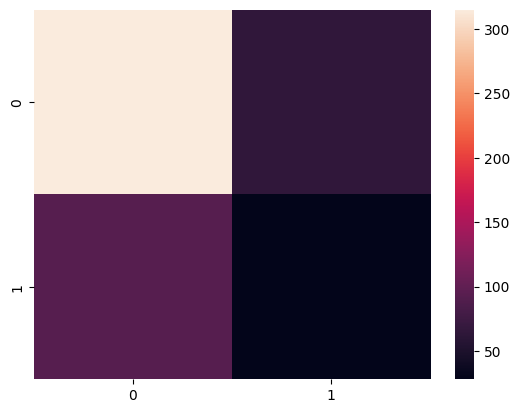

In [88]:
plot=sns.heatmap(cmatrix)
 
plt.show()